In [1]:
!pip install autokeras

  Using cached autokeras-2.0.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached rich-13.8.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.2/572.2 kB 23.6 MB/s eta 0:00:00
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.9 MB/s eta 0:00:00
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 36.3 MB/s eta 0:00:00
Using cached rich-13.8.0-py3-none-any.whl (241 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.8 MB/s eta 0:00

In [3]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist

import autokeras as ak

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(100, 28, 28)
(100,)
[5 0 4]


In [5]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=1)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 00m 01s]
val_loss: 2.0193915367126465

Best val_loss So Far: 2.0193915367126465
Total elapsed time: 00h 00m 01s
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1237 - loss: 2.2603  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/michael/miniconda3/envs/autoKeras/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[['9']
 ['0']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['4']
 ['0']
 ['9']
 ['0']
 ['0']
 ['9']
 ['0']
 ['1']
 ['0']
 ['4']
 ['3']
 ['3']
 ['4']
 ['9']
 ['6']
 ['0']
 ['0']
 ['4']
 ['0']
 ['3']
 ['4']
 ['0']
 ['1']
 ['3']
 ['3']
 ['3']
 ['0']
 ['3']
 ['0']
 ['3']
 ['1']
 ['3']
 ['1']
 ['1']
 ['3']
 ['4']
 ['3']
 ['3']
 ['3']
 ['3']
 ['0']
 ['4']
 ['4']
 ['6']
 ['3']
 ['0']
 ['3']
 ['0']
 ['0']
 ['4']
 ['1']
 ['9']
 ['9']
 ['3']
 ['0']
 ['3']
 ['3']
 ['3']
 ['3']
 ['0']
 ['4']
 ['3']
 ['0']
 ['3']
 ['0']
 ['0']
 ['9']
 ['1']
 ['4']
 ['3']
 ['9']
 ['9']
 ['9']
 ['4']
 ['6']
 ['0']
 ['4']
 ['4']
 ['4']
 ['9']
 ['3']
 ['0']
 ['1']
 ['3']
 ['6']
 ['9']
 ['3']
 ['1']
 ['0']
 ['3']
 ['3']
 ['0']
 ['4']]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 2.0037  
[2.016324996948242, 0.5199999809265137]


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from IPython.display import Image as IPImage, display  # for displaying images in Jupyter

# Check if TensorFlow detects a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


# File paths for the Fake and Real image directories
fake_dir = '/home/michael/Documenti/Milinda_Githubproject/FIDAC_1.0/Tampered_Images_resize/'
real_dir = '/home/michael/Documenti/Milinda_Githubproject/FIDAC_1.0/Authentic Image_Rescieved/'

# Prepare the data
def prepare_data(fake_dir, real_dir, img_size=(256, 256)):
    images = []
    image_paths = []
    labels = []
    
    # Fake images
    for img_name in os.listdir(fake_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(fake_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(0)  # Fake = 0
            image_paths.append(img_path)

    # Real images
    for img_name in os.listdir(real_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(real_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(1)  # Real = 1
            image_paths.append(img_path)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels, image_paths

# Load and prepare the data
x_data, y_data, image_paths = prepare_data(fake_dir, real_dir)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test, image_paths_train, image_paths_test = train_test_split(x_data, y_data, image_paths, test_size=0.2, random_state=42)

# Initialize the AutoKeras ImageClassifier
clf = ak.ImageClassifier(overwrite=True, max_trials=3)  # max_trials sets the number of models to try

# Train the classifier
clf.fit(x_train, y_train, epochs=10)  # Increase epochs to train longer if needed









Trial 3 Complete [00h 35m 16s]
val_loss: 0.6302657127380371

Best val_loss So Far: 0.6159526109695435
Total elapsed time: 00h 47m 45s


2024-09-04 15:04:35.205114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_29' with dtype float and shape [1447,256,256,3]
	 [[{{node Placeholder/_29}}]]
2024-09-04 15:04:35.205386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_29' with dtype float and shape [1447,256,256,3]
	 [[{{node Placeholder/_29}}]]


Epoch 1/10


2024-09-04 15:04:36.588352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_29' with dtype float and shape [1447,256,256,3]
	 [[{{node Placeholder/_29}}]]
2024-09-04 15:04:36.588582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1447,256,256,3]
	 [[{{node Placeholder/_0}}]]


46/46 [==============================] - 67s 1s/step - loss: 1.0734 - accuracy: 0.6130
Epoch 2/10
46/46 [==============================] - 63s 1s/step - loss: 0.6448 - accuracy: 0.6683
Epoch 3/10
46/46 [==============================] - 63s 1s/step - loss: 0.6752 - accuracy: 0.6579
Epoch 4/10
46/46 [==============================] - 63s 1s/step - loss: 0.6582 - accuracy: 0.6621
Epoch 5/10
46/46 [==============================] - 63s 1s/step - loss: 0.6433 - accuracy: 0.6607
Epoch 6/10
46/46 [==============================] - 63s 1s/step - loss: 0.6565 - accuracy: 0.6593
Epoch 7/10
46/46 [==============================] - 63s 1s/step - loss: 0.6555 - accuracy: 0.6641
Epoch 8/10
46/46 [==============================] - 63s 1s/step - loss: 0.6564 - accuracy: 0.6648
Epoch 9/10
46/46 [==============================] - 63s 1s/step - loss: 0.6441 - accuracy: 0.6600
Epoch 10/10
46/46 [==============================] - 63s 1s/step - loss: 0.6374 - accuracy: 0.6738


2024-09-04 15:15:11.593642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,256,256,3]
	 [[{{node input_1}}]]
2024-09-04 15:15:11.692678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}}]]
2024-09-04 15:15:11.696605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}

INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets
2024-09-04 15:15:19.973153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype float and shape [362,256,256,3]
	 [[{{node Placeholder/_13}}]]
2024-09-04 15:15:19.973283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64 and shape [362]
	 [[{{node Placeholder/_18}}]]


12/12 [==============================] - 7s 521ms/step - loss: 0.7170 - accuracy: 0.6160
Test Accuracy: 0.616


2024-09-04 15:15:29.782595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [362,256,256,3]
	 [[{{node Placeholder/_0}}]]
2024-09-04 15:15:29.782697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [362,256,256,3]
	 [[{{node Placeholder/_0}}]]


12/12 [==============================] - 6s 522ms/step
Predicted labels: [1. 1. 1. 0. 1.]
True labels: [1 0 1 1 1]
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/home/michael/miniconda3/envs/autoKeras/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# Evaluate the model on the test data
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# Predict with the best model
y_pred = clf.predict(x_test)
print(f"Predicted labels: {y_pred[:5].flatten()}")
print(f"True labels: {y_test[:5]}")

2024-09-04 15:23:45.197970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64 and shape [362]
	 [[{{node Placeholder/_18}}]]
2024-09-04 15:23:45.198101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64 and shape [362]
	 [[{{node Placeholder/_18}}]]


12/12 [==============================] - 7s 521ms/step - loss: 0.7170 - accuracy: 0.6160
Test Accuracy: 0.616


2024-09-04 15:23:54.947866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [362,256,256,3]
	 [[{{node Placeholder/_0}}]]
2024-09-04 15:23:54.947960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [362,256,256,3]
	 [[{{node Placeholder/_0}}]]


12/12 [==============================] - 6s 519ms/step
Predicted labels: [1. 1. 1. 0. 1.]
True labels: [1 0 1 1 1]


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6160
Precision: 0.6462
Recall: 0.8974
F1 Score: 0.7513


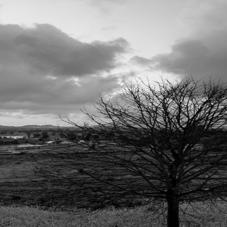

True Label: Fake
Predicted Label: Real


In [13]:
# Take one image from the test data, show it, and display the label and prediction
sample_index = 10  # You can change this index to display a different image

sample_image_path = image_paths_test[sample_index]
true_label = y_test[sample_index]

# Convert predicted_label to a scalar if it's a numpy array
predicted_label = y_pred[sample_index]
if isinstance(predicted_label, np.ndarray):
    predicted_label = predicted_label.item()

# Convert label numbers to human-readable labels
label_map = {0: 'Fake', 1: 'Real'}
true_label_text = label_map[true_label]
predicted_label_text = label_map[predicted_label]

# Display the image
display(IPImage(filename=sample_image_path))

# Print the true label and predicted label
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")
